In [53]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sb
from sklearn.model_selection import train_test_split


In [54]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [82]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [83]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# ~~Preprocessing~~ Uncleaning the data

In [85]:
# Since the data has already been preprocessed we just have to "undo" the preprocessing
unclean_df = df.drop([], axis=1)

def unclean(val):
    return 'Yes' if val == 1 else 'No'

unclean_df['sex'] = unclean_df['sex'].apply(lambda x: 'Male' if x == 1 else 'Female')
unclean_df['diabetes'] = unclean_df['diabetes'].apply(unclean)
unclean_df['high_blood_pressure'] = unclean_df['high_blood_pressure'].apply(unclean)
unclean_df['anaemia'] = unclean_df['anaemia'].apply(unclean)
unclean_df['smoking'] = unclean_df['smoking'].apply(unclean) 

unclean_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Male,No,4,1
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Male,No,6,1
2,65.0,No,146,No,20,No,162000.00,1.3,129,Male,Yes,7,1
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Male,No,7,1
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,Female,No,8,1


I wonder what the age of these patients is

<AxesSubplot:xlabel='age', ylabel='Count'>

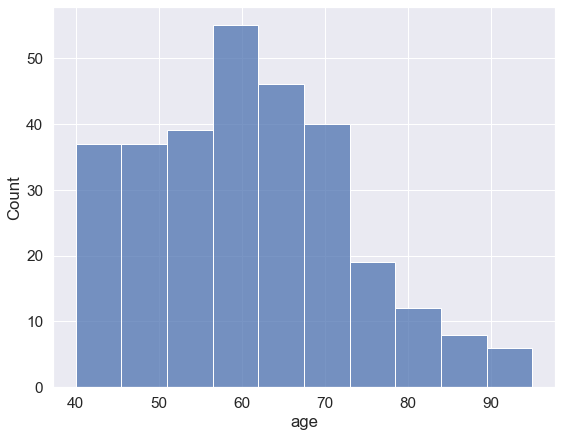

In [56]:
plot.figure(figsize=(9, 7))
sb.histplot(data=df, x='age') 

## Lets categorise age by gender

<AxesSubplot:xlabel='age', ylabel='sex'>

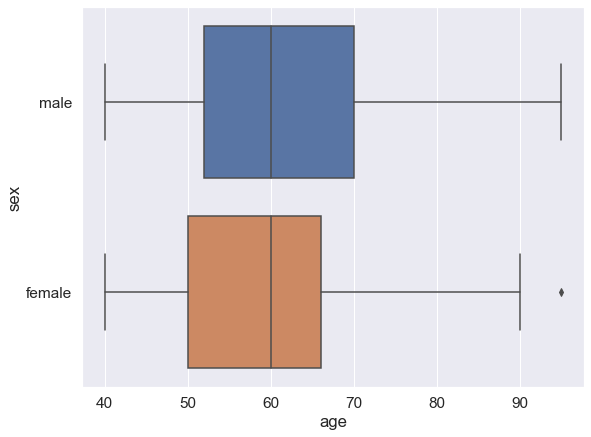

In [57]:
plot.figure(figsize=(9, 7))
sb.boxplot(x='age', data=unclean_df, y='sex') 

## Diabetes vs Age

<AxesSubplot:xlabel='diabetes', ylabel='age'>

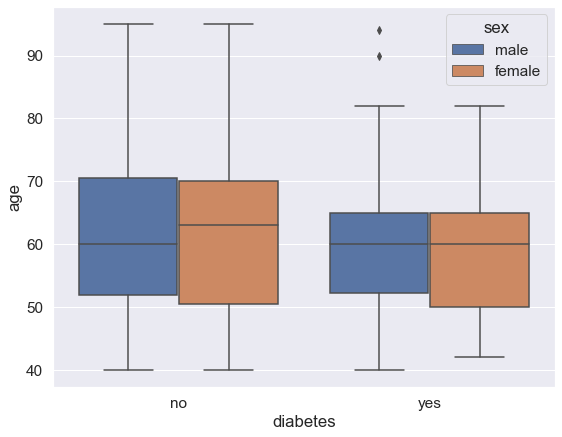

In [58]:
plot.figure(figsize=(9, 7)) 
sb.boxplot(x='diabetes', y='age', data=unclean_df, hue='sex')

## High Blood Pressure vs Age

<AxesSubplot:xlabel='high_blood_pressure', ylabel='age'>

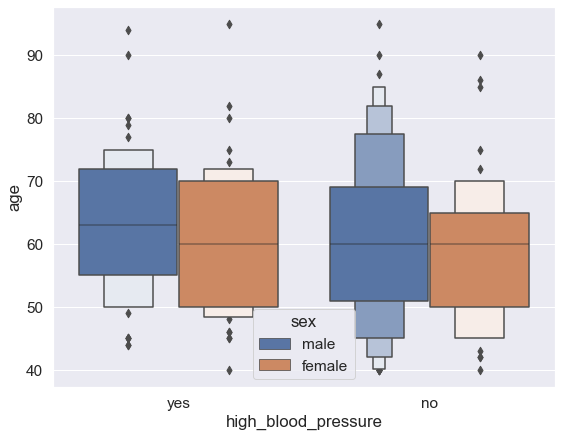

In [59]:
plot.figure(figsize=(9, 7))
sb.boxenplot(x='high_blood_pressure', y='age', data=unclean_df, hue='sex')


## Smoker vs Age

<AxesSubplot:xlabel='smoking', ylabel='age'>

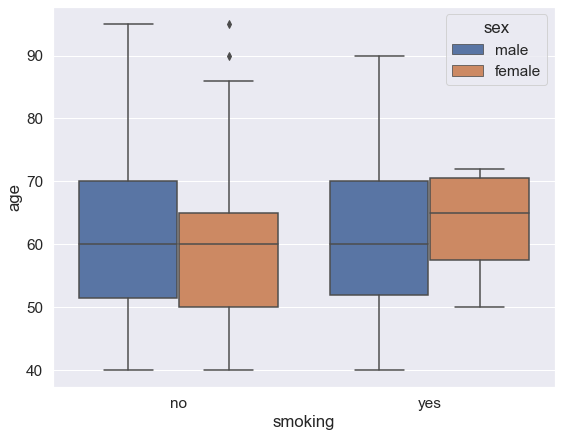

In [60]:
plot.figure(figsize=(9, 7))
sb.boxplot(x='smoking', y='age', data=unclean_df, hue='sex')


<AxesSubplot:>

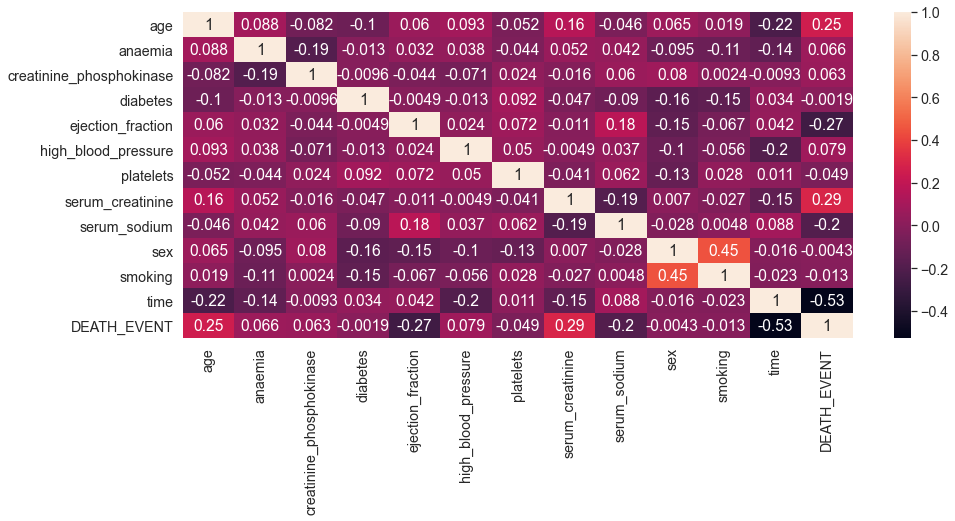

In [81]:
sb.set(font_scale=1.3)
plot.figure(figsize=(15, 6))
sb.heatmap(df.corr(), annot=True) 

# Feature Extraction

In [62]:
x = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT'] 

In [63]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2) 

In [64]:
print("xtrain", xtrain.shape)
print("ytrain\n", ytrain.shape)
print("xtest: ", xtest.shape)
print("ytest: ", ytest.shape)

xtrain (239, 12)
ytrain
 (239,)
xtest:  (60, 12)
ytest:  (60,)


# Building the models

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [66]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Classifier', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Gradient Boost', GradientBoostingClassifier()),
]

In [67]:
predictions = []

for _, model in models:
    model.fit(xtrain, ytrain)
    predictions.append(model.predict(xtest))


# Evaluation

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [69]:
accuracy = []

for index, pred in enumerate(predictions):
    print("Model: ", models[index][0])
    print(classification_report(ytest, pred, zero_division=0)) 
    accuracy.append(accuracy_score(ytest, pred))

Model:  Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        44
           1       0.62      0.62      0.62        16

    accuracy                           0.80        60
   macro avg       0.74      0.74      0.74        60
weighted avg       0.80      0.80      0.80        60

Model:  Support Vector Classifier
              precision    recall  f1-score   support

           0       0.73      1.00      0.85        44
           1       0.00      0.00      0.00        16

    accuracy                           0.73        60
   macro avg       0.37      0.50      0.42        60
weighted avg       0.54      0.73      0.62        60

Model:  Random Forest
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        44
           1       0.63      0.75      0.69        16

    accuracy                           0.82        60
   macro avg       0.77      0.80      0.78 

In [70]:
data = [(models[i][0], accuracy[i]) for i in range(len(accuracy))]
model_accuracies = pd.DataFrame(data=data, columns=['Model Name', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
model_accuracies

,Model Name,Accuracy
2,Random Forest,0.816667
0,Logistic Regression,0.800000
4,Gradient Boost,0.800000
1,Support Vector Classifier,0.733333
3,Decision Tree,0.716667


<AxesSubplot:xlabel='Model Name', ylabel='Accuracy'>

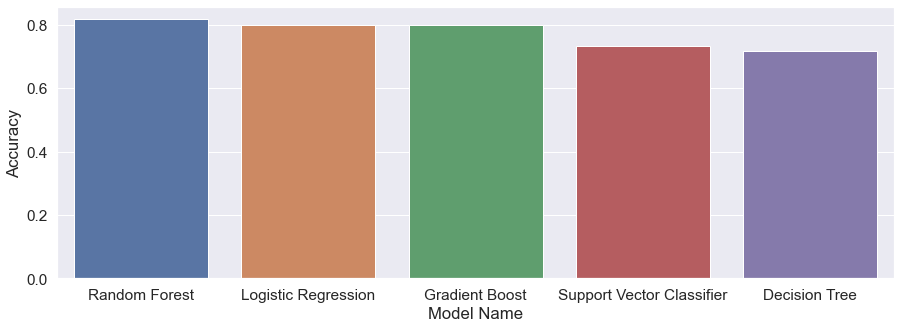

In [71]:
plot.figure(figsize=(15, 5))
sb.set(font_scale=1.4)
sb.barplot(data=model_accuracies, x='Model Name', y='Accuracy')

## Random Forest has the best accuracy score

## Lets check confusion matrices

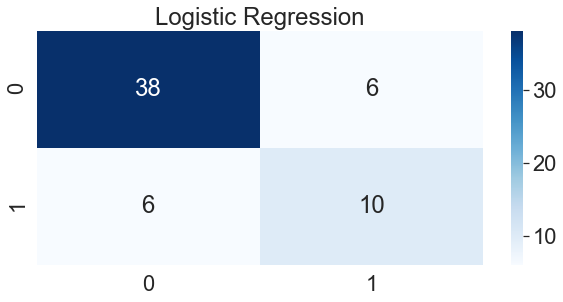

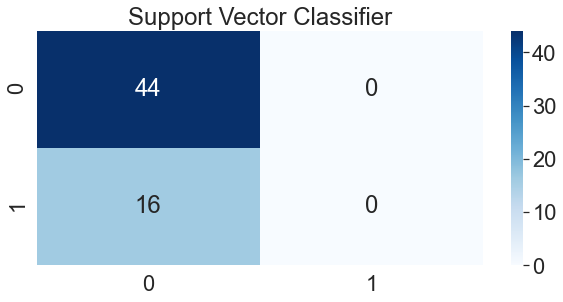

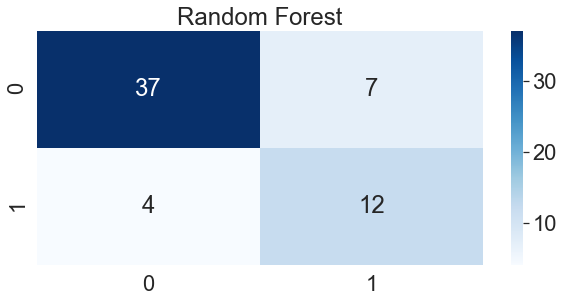

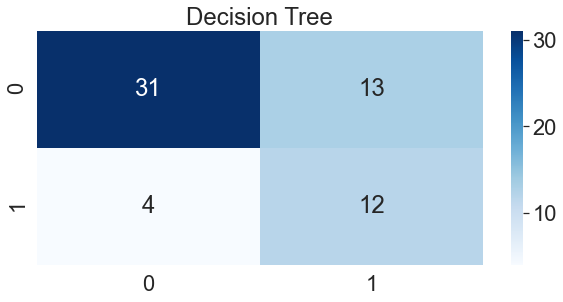

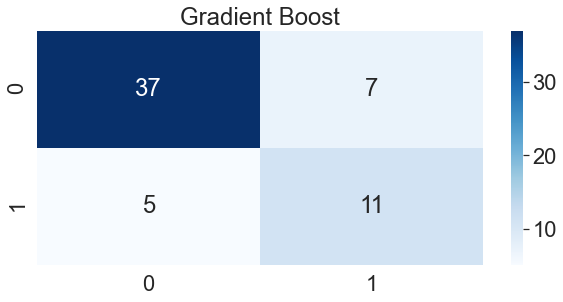

In [72]:
sb.set(font_scale=2)
for i, pred in enumerate(predictions):
    plot.figure(figsize=(10, 25))
    plot.subplot(5, 1, i + 1)
    plot.title(models[i][0])
    sb.heatmap(confusion_matrix(ytest, pred), annot=True, cmap='Blues') 
    plot.show()
